In [46]:
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
import numpy as np

# Nesse codigo eu nao quis que ele identificasse cada uma das fotos, eu queria ver se ele conseguia recohecer apenas as que sao carros

In [5]:
(x_treino, y_treino), (x_teste, y_teste) = cifar10.load_data() # Carrega os dados do dataset CIFAR-10

verificando o tamanho da base de dados

In [6]:
x_treino.shape, y_treino.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_teste.shape, y_teste.shape

((10000, 32, 32, 3), (10000, 1))

In [24]:
classes = ['avião', 'carro', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

Classe: [6]


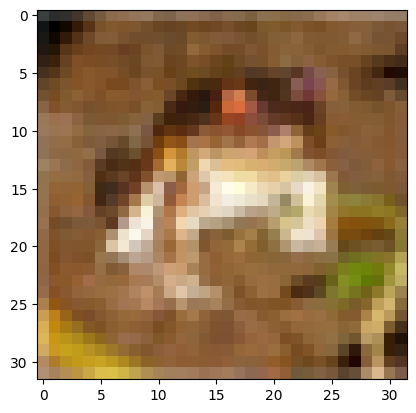

In [10]:
plt.imshow(x_treino[0])
print(f"Classe: {y_treino[0]}")

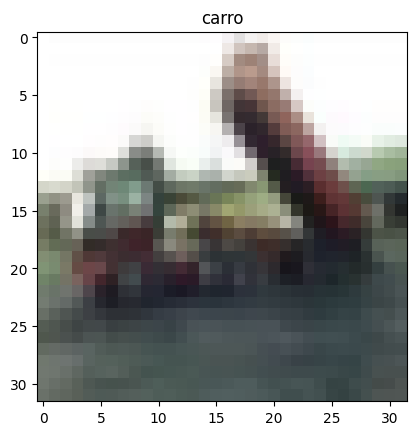

In [37]:
plt.imshow(x_treino[2])
plt.title(classes[y_treino[indice][0]])
plt.show()

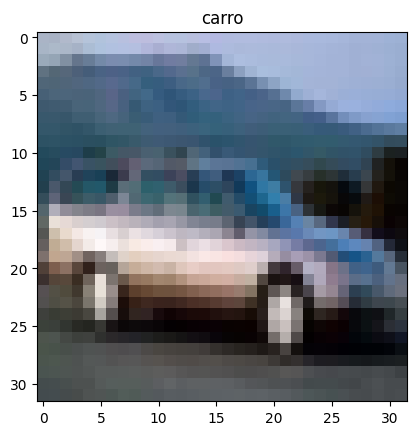

In [35]:
plt.imshow(x_treino[4])
plt.title(classes[y_treino[indice][0]])
plt.show()

In [38]:
#Aqui estou rotulando para carros (1) e nao carros (0)
classe_carro = 1
classe_nao_carro = 0

In [40]:
# Seleciona índices com rótulos 0 ou 1
filtro_treino = np.where((y_treino == classe_carro) | (y_treino == classe_nao_carro))[0]
filtro_teste = np.where((y_teste == classe_carro) | (y_teste == classe_nao_carro))[0]

In [41]:
x_treino = x_treino[filtro_treino]
y_treino = y_treino[filtro_treino]
x_teste = x_teste[filtro_teste]
y_teste = y_teste[filtro_teste]

In [51]:
#mudando os rotulos para 0 e 1 (1 carro, 0 nao carro)
y_treino = (y_treino == classe_carro).astype(int)
y_teste = (y_teste == classe_carro).astype(int)

In [52]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

In [50]:
#Normalizando todas as cores para 0 e 1
x_treino = x_treino / 255
x_teste = x_teste / 255

Criando a rede neural Simples

In [59]:
modelo = Sequential()
modelo.add(InputLayer(input_shape=(32, 32, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Flatten())
modelo.add(Dense(units=128, activation='relu'))
modelo.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [60]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
modelo.fit(x = x_treino, y = y_treino, batch_size = 10,  validation_data=(x_teste, y_teste), epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5578 - loss: 0.6756 - val_accuracy: 0.6265 - val_loss: 0.6165
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7252 - loss: 0.5514 - val_accuracy: 0.7465 - val_loss: 0.5211
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7429 - loss: 0.5342 - val_accuracy: 0.7640 - val_loss: 0.5031
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7492 - loss: 0.5121 - val_accuracy: 0.7600 - val_loss: 0.4961
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7557 - loss: 0.5097 - val_accuracy: 0.7680 - val_loss: 0.4925
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7615 - loss: 0.5012 - val_accuracy: 0.7680 - val_loss: 0.4866
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7581 - loss: 0.5026 - val_accuracy: 0.7720 - val_loss: 0.4830
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7552 -

In [62]:
loss, accuracy = modelo.evaluate(x_teste, y_teste)

print(f"Loss no conjunto de teste: {loss}")
print(f"Acurácia no conjunto de teste: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7758 - loss: 0.4810
Loss no conjunto de teste: 0.47967636585235596
Acurácia no conjunto de teste: 0.7764999866485596


# Melhorando a rede neural

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

modelo = Sequential()
modelo.add(InputLayer(input_shape=(32, 32, 3)))  # Imagens 32x32 em escala de cinza

modelo.add(Conv2D(32, (3,3), activation='relu'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(1, activation='sigmoid'))  # Saída binária


In [67]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
modelo.fit(x = x_treino, y = y_treino, batch_size = 10,  validation_data=(x_teste, y_teste), epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.8149 - loss: 0.4013 - val_accuracy: 0.8010 - val_loss: 0.4363
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9036 - loss: 0.2331 - val_accuracy: 0.5020 - val_loss: 5.0034
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9269 - loss: 0.1841 - val_accuracy: 0.5100 - val_loss: 4.9325
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9397 - loss: 0.1509 - val_accuracy: 0.8965 - val_loss: 0.3317
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9489 - loss: 0.1298 - val_accuracy: 0.6360 - val_loss: 2.3976
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9551 - loss: 0.1139 - val_accuracy: 0.8965 - val_loss: 0.4160
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9646 - loss: 0.0941 - val_accuracy: 0.5000 - val_loss: 7.8570
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9632 -

In [69]:
loss, accuracy = modelo.evaluate(x_teste, y_teste)

print(f"Loss no conjunto de teste: {loss}")
print(f"Acurácia no conjunto de teste: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6244 - loss: 1.7944
Loss no conjunto de teste: 1.928378701210022
Acurácia no conjunto de teste: 0.6119999885559082


E podemos ver que a rede neural mais complexa, deu um resultado pior

# Validaçao cruzada

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
# K-fold com 5 grupos balanceados
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [85]:
resultados = []

for indice_treinamento, indice_teste in kfold.split(x_treino, y_treino):
    print(f'Índices treino: {indice_treinamento} \t Índices teste: {indice_teste}')

    modelo = Sequential()
    modelo.add(InputLayer(input_shape=(32, 32, 3)))
    modelo.add(Conv2D(32, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(units=128, activation='relu'))
    modelo.add(Dense(units=1, activation='sigmoid'))

    modelo.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    modelo.fit(x_treino[indice_treinamento], y_treino[indice_treinamento],
                    batch_size=32,
                    epochs=10,
                    verbose=0)

    precisao = modelo.evaluate(x_treino[indice_teste], y_treino[indice_teste], verbose=0)
    resultados.append(precisao[1])  # Só a acurácia

Índices treino: [   0    1    2 ... 9996 9997 9998] 	 Índices teste: [   7    8   10 ... 9994 9995 9999]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Índices treino: [   1    3    4 ... 9997 9998 9999] 	 Índices teste: [   0    2    6 ... 9980 9985 9987]
Índices treino: [   0    2    6 ... 9997 9998 9999] 	 Índices teste: [   1    3    4 ... 9983 9986 9989]
Índices treino: [   0    1    2 ... 9994 9995 9999] 	 Índices teste: [  20   21   23 ... 9996 9997 9998]
Índices treino: [   0    1    2 ... 9997 9998 9999] 	 Índices teste: [  17   24   33 ... 9979 9990 9993]


In [86]:
resultados

[0.8245000243186951,
 0.8040000200271606,
 0.8004999756813049,
 0.7925000190734863,
 0.8395000100135803]

In [87]:
import numpy as np

np.mean(resultados)

np.float64(0.8122000098228455)

In [88]:
np.std(resultados)

np.float64(0.017255727362818517)